**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

1) Load the dataset and perform splitting into training and validation sets with 70:30 ratio.

> Do we need to normalise data? [If so Does it make any difference?]

2) Implement the K Means algorithm. You need to find the optimal number of clusters using the


    elbow method and silhouette method. 

3) Define the initial clusters’ centroids using:</br>
> i) Forgy</br>

> ii) Random Partition

4) Experiment with different distance measures[Euclidean distance, Manhattan distance].

5) Plot the error vs number of clusters graph while using the elbow method and silhouette 
    method. Report the optimal number of clusters found.

6) Report the training and the validation accuracy and Compare your trained model with a model trained by the scikit-learn

7) Visualize the dataset to depict the clusters formed. #Prefer T-SNE

8) Implement K-means++, and repeat task 1 to task 7 again.</br>
</br>
</br>
**Part 2:**
</br>
In this task, you will perform operations on `[data.csv](https://drive.google.com/file/d/15NPkfXFoTkiRBlcI4ffe_Lp_BFOyf8UY/view?usp=sharing)`, data.csv is a  latent space representation of  Fashion-MNIST, before doing this task please read about latent space representation.

9) Load the data.csv file and apply Kmeans and Kmeans++, You need to find the optimal number of clusters using the elbow method and silhouette method.

10) Visualize the dataset to depict the clusters formed. # Prefer T-SNE

11) From these experiments(Part 1 and Part 2), compare accuracy or error, and report which one is better and why?
</br>
</br>
**Note:** If the model takes a lot of time to train you can use MiniBatchKMeans.
 




# PART : 1

## Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle as pkl
import random 
from sklearn.metrics.cluster import homogeneity_score
from sklearn.cluster import KMeans
import sys 
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

In [ ]:
#---------------------------------------- UTILITIES ----------------------------------------#

def save_to_pickle(arr, filename):
    with open(filename,'wb') as f:
        pkl.dump(arr, f)
     
def load_from_pickle(filename):
    arr = []
    with open(filename,'rb') as f:
        arr = pkl.load(f)
    return arr

## Data Splitting

#### Note : No need to Normalize data as all pixel values falls in same range

In [ ]:
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

x = []
for row in trainX:
    temp = row.flatten()
    x.append(temp)
trainX = np.array(x)

x = []
for row in testX:
    temp = row.flatten()
    x.append(temp)
testX = np.array(x)

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(trainX, trainy, test_size = 0.3, random_state = 55)

print(X_train.shape)
print(y_train.shape)
print(X_validation.shape)
print(y_validation.shape)


(42000, 784)
(42000,)
(18000, 784)
(18000,)


In [ ]:
def euclidean(a, b):
    return np.sum(np.square(a - b))

def manhattan(a, b):
    return np.sum(np.abs(a - b))

## Implementation of Kmeans Algorithm

In [ ]:
def kmeans(k, X, init_method, distance_metric):

    centroids = []
    clusters = []

    if init_method == "forgy":
        centroids = forgy_init(X, k)
    elif init_method == "random_partition":
        centroids = random_partition(X, k)
    else:
        centroids = kmeans_plus_plus(X, k, distance_metric)
    
    for itr in range(10):
        clusters = []
        for x in X:
            dist = []
            for cent in centroids:
                if distance_metric=="euclidean":
                    dist.append(euclidean(cent, x))
                else:
                    dist.append(manhattan(cent, x))
            clusters.append(np.argmin(dist))

        temp = []
        tempdf = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
        for c in set(tempdf['cluster']):
            row = tempdf['cluster']
            col = tempdf.columns[:-1]
            clr = tempdf[row==c][col]
            temp.append(clr.mean(axis=0))

        centroids = temp

    return centroids, clusters


def kmeans2(k, X, init_method, distance_metric):

    centroids = []
    clusters = []
    clusters2 = []

    if init_method == "forgy":
        centroids = forgy_init(X, k)
    elif init_method == "random_partition":
        centroids = random_partition(X, k)
    else:
        centroids = kmeans_plus_plus(X, k, distance_metric)
    
    for itr in range(10):
        clusters = []
        clusters2 = []
        for x in X:
            dist = []
            for cent in centroids:
                if distance_metric=="euclidean":
                    dist.append(euclidean(cent, x))
                else:
                    dist.append(manhattan(cent, x))
            clusters.append(np.argmin(dist))
            clusters2.append(dist.index(sorted(dist)[1]))

        temp = []
        tempdf = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
        for c in set(tempdf['cluster']):
            row = tempdf['cluster']
            col = tempdf.columns[:-1]
            clr = tempdf[row==c][col]
            temp.append(clr.mean(axis=0))

        centroids = temp

    return centroids, clusters, clusters2

## Forgy and Random Partioning

In [ ]:
def forgy_init(X, k):
    centroid = []
    for i in range(k):
        r = random.randint(0, len(X))
        centroid.append(X[r])
    return centroid


def random_partition(X, k):
    random_clusters = []
    temp = []

    for i in range(len(X)):
        r = random.randint(0, k)
        random_clusters.append(r)
    random_clusters = np.array(random_clusters)

    for c in range(0, k):
        temp.append(X[random_clusters == c].mean(axis=0))

    centroid = np.concatenate([v[ None, :] for v in temp], axis = 0)
    return centroid

## Kmeans ++ Algo

In [ ]:
def kmeans_plus_plus(X, k, distance_metric):
    centroids = []
    r = random.randint(0, len(X))
    centroids.append(X[r])

    itr = 1 
    while (itr<k): 
        distances = [] 

        for row in X: 
            temp = sys.maxsize 
            
            j=0
            while (j<len(centroids)):
                temp = min(manhattan(row, centroids[j]), temp)
                if distance_metric=="euclidean":
                    temp = min(euclidean(row, centroids[j]), temp)
                j+=1 

            distances.append(temp) 
              
        centroids.append(X[np.argmax(np.array(distances) ), :]) 
        itr+=1 

    return centroids 

## Elbow Function

In [ ]:
def compute_elbow_cost(X, y, k, algo, distance_metric):
    cent, clusters = kmeans(k, X, algo, distance_metric)
    print("K =",k, end=" -> ")
    print(homogeneity_score(y, clusters))
    cost = 0
    for i in range(len(X)):
        temp = manhattan(X[i], cent[clusters[i]])
        if distance_metric=="euclidean":
            temp = euclidean(X[i], cent[clusters[i]])
        elif distance_metric=="k++":
            temp = euclidean(X[i], cent[clusters[i]])
        cost+=temp
    return cost


def elbow(algo, distance_metric):
    costs = []
    print("Homogenity Score")
    print("----------------\n")
    for k in range(1,21):
        costs.append(compute_elbow_cost(X_validation, y_validation, k, algo, distance_metric))
    return costs


def plot_elbow(costs):
    K = []
    for i in range(0,20):
        K.append(i+1)
    plt.plot(K, costs, color ='blue')
    plt.grid()
    plt.title("K vs kmeans cost")
    plt.xlabel("K")
    plt.ylabel("kmeans cost")


## Silhoutte Function

In [ ]:
def compute_silhoutte_cost(X, y, k, algo, distance_metric):
    cent, clusters1, clusters2 = kmeans2(k, X, algo, distance_metric)
    #print(len(clusters1))
    #print(len(clusters2))
    cost = []
    for i in range(X.shape[0]):
        
        lbl = clusters1[i]
        alist = []
        for j in range(len(clusters1)):

            if (clusters1[j]==lbl):
                dist = manhattan(X[i], X[j])
                if distance_metric=="euclidean":
                    dist = euclidean(X[i], X[j])
                alist.append(dist)
        a = sum(alist)/len(alist)

        lbl = clusters2[i]
        blist = []
        for j in range(len(clusters2)):

            if (clusters1[j]==lbl):
                dist = manhattan(X[i], X[j])
                if distance_metric=="euclidean":
                    dist = euclidean(X[i], X[j])
                blist.append(dist)
        b = sum(blist)/len(blist)

        sil = (b-a)/max(b,a)

        cost.append(sil)
    
    return sum(cost)/len(cost)


def silhoute(algo, distance_metric):
    costs = []
    for k in range(2,21):
        costs.append(compute_silhoutte_cost(X_validation, y_validation, k, algo, distance_metric))
    return costs


def plot_silhoute(costs):
    K = []
    for i in range(1,20):
        K.append(i+1)
    plt.plot(K, costs, color ='blue')
    plt.grid()
    plt.title("K vs silhoute cost")
    plt.xlabel("K")
    plt.ylabel("silhoute cost")

## Graph with Forgy initialization

1. With euclidean distance

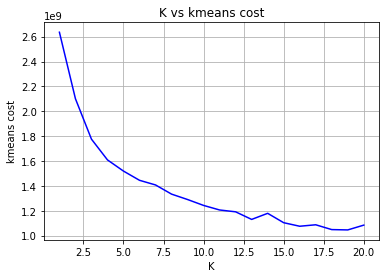

In [ ]:
#costs = elbow("forgy", "euclidean")
#print(costs)
#costs = np.array(costs)
#save_to_pickle(costs, "forgy_euclidean.pkl")
costs = load_from_pickle("forgy_euclidean.pkl")
plot_elbow(costs)

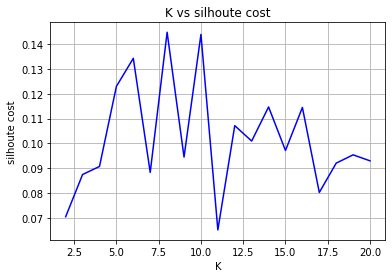

In [ ]:
#costs = silhoute("forgy", "euclidean")
#print(costs)
#costs = np.array(costs)
#save_to_pickle(costs, "sforgy_euclidean.pkl")
costs = load_from_pickle("sforgy_euclidean.pkl")
plot_silhoute(costs)

2. With manhattan distance

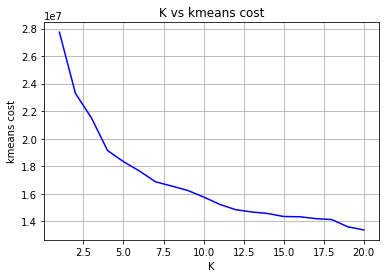

In [ ]:
#costs = elbow("forgy", "manhattan")
#print(costs)
#costs = np.array(costs)
#save_to_pickle(costs, "forgy_manhattan.pkl")
costs = load_from_pickle("forgy_manhattan.pkl")
plot_elbow(costs)

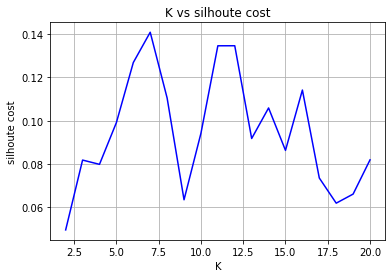

In [ ]:
#costs = silhoute("forgy", "manhattan")
#print(costs)
#costs = np.array(costs)
#save_to_pickle(costs, "sforgy_manhattan.pkl")
costs = load_from_pickle("sforgy_manhattan.pkl")
plot_silhoute(costs)

## Graph with Random Partioning

1. With euclidean distance

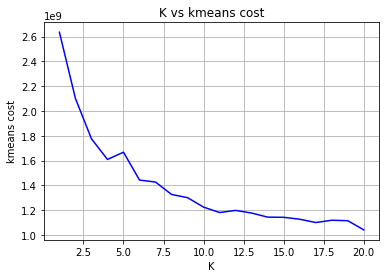

In [ ]:
#costs = elbow("random_partition", "euclidean")
#print(costs)
#costs = np.array(costs)
#save_to_pickle(costs, "random_euclidean.pkl")
costs = load_from_pickle("random_euclidean.pkl")
plot_elbow(costs)

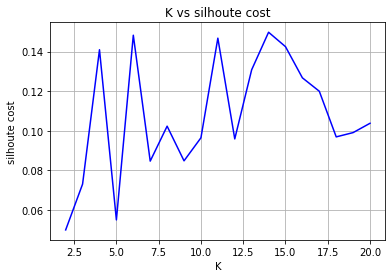

In [ ]:
#costs = silhoute("random_partition", "manhattan")
#print(costs)
#costs = np.array(costs)
#save_to_pickle(costs, "srandom_euclidean.pkl")
costs = load_from_pickle("srandom_euclidean.pkl")
plot_silhoute(costs)

2. With manhattan distance

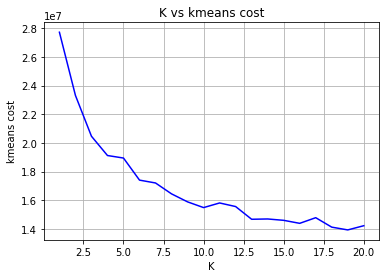

In [ ]:
#costs = elbow("random_partition", "manhattan")
#print(costs)
#costs = np.array(costs)
#save_to_pickle(costs, "random_manhattan.pkl")
costs = load_from_pickle("random_manhattan.pkl")
plot_elbow(costs)

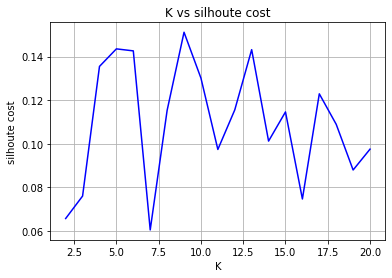

In [ ]:
#costs = silhoute("random_partition", "manhattan")
#print(costs)
#costs = np.array(costs)
#save_to_pickle(costs, "srandom_manhattan.pkl")
costs = load_from_pickle("srandom_manhattan.pkl")
plot_silhoute(costs)

## Graph for Kmeans ++

1. With euclidean distance

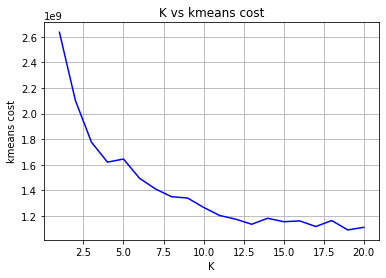

In [ ]:
#costs = elbow("k++", "euclidean")
#print(costs)
#costs = np.array(costs)
#save_to_pickle(costs, "euclideank++.pkl")
costs = load_from_pickle("euclideank++.pkl")
plot_elbow(costs)

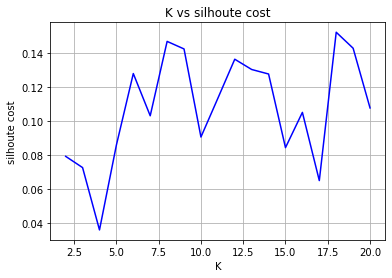

In [ ]:
#costs = silhoute("k++", "euclidean")
#print(costs)
#costs = np.array(costs)
#save_to_pickle(costs, "seuclideank++.pkl")
costs = load_from_pickle("seuclideank++.pkl")
plot_silhoute(costs)

2. With manhattan distance

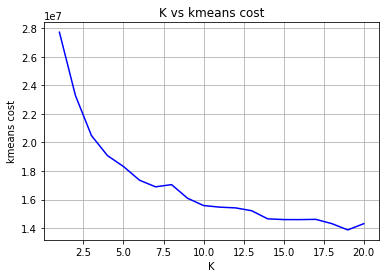

In [ ]:
#costs = elbow("k++", "manhattan")
#print(costs)
#costs = np.array(costs)
#save_to_pickle(costs, "manhattank++.pkl")
costs = load_from_pickle("manhattank++.pkl")
plot_elbow(costs)

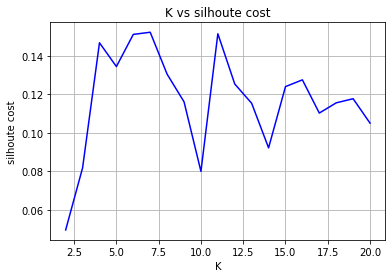

In [ ]:
#costs = silhoute("k++", "manhattan")
#print(costs)
#costs = np.array(costs)
#save_to_pickle(costs, "smanhattank++.pkl")
costs = load_from_pickle("smanhattank++.pkl")
plot_silhoute(costs)

### **INFERENCE** : K = 10 is optimal

## Creating clusters on training data

In [ ]:
optimalK = 10

def fit(X, k, algo, distance_metric):
    cent, clusters = kmeans(k, X, algo, distance_metric)
    cent = np.array(cent)
    clusters = np.array(clusters)
    return cent, clusters


def get_accuracy_score(y, clusters):
    return (homogeneity_score(y, clusters))


#kmeans_centroids, kmeans_clusters = fit(X_train, optimalK, "random_partition", "euclidean")
#save_to_pickle(kmeans_centroids, "kmeans_centroids.pkl")
#save_to_pickle(kmeans_clusters, "kmeans_clusters.pkl")
kmeans_centroids = load_from_pickle("kmeans_centroids.pkl")
kmeans_clusters = load_from_pickle("kmeans_clusters.pkl")

print("Homogenity score for kmeans")
print("---------------------------\n")
print(get_accuracy_score(y_train, kmeans_clusters))

#kplus_centroids, kplus_clusters = fit(X_train, optimalK, "k++", "euclidean")
#save_to_pickle(kplus_centroids, "k++_centroids.pkl")
#save_to_pickle(kplus_clusters, "k++_clusters.pkl")
kplus_centroids = load_from_pickle("k++_centroids.pkl")
kplus_clusters = load_from_pickle("k++_clusters.pkl")

print("\n\nHomogenity score for kmeans++")
print("-----------------------------\n")
print(get_accuracy_score(y_train, kplus_clusters))

Homogenity score for kmeans
---------------------------

0.5297896110187651


Homogenity score for kmeans++
-----------------------------

0.5227985932572002


## K means using Sklearn

In [ ]:
#kmeans = KMeans(n_clusters = 10, random_state = 55).fit(X_train)
print("Homogenity score for kmeans using sklearn")
print("---------------------------------------------\n")
#save_to_pickle(kmeans.labels_, "sklearn_labels.pkl")
sklearn_labels = load_from_pickle("sklearn_labels.pkl")
print(get_accuracy_score(y_train, sklearn_labels))

Homogenity score for kmeans using sklearn
---------------------------------------------

0.5468278842357124


In [ ]:
#implement silhouette method from scratch
def silhouette():
    print("None")




---



# PART : 2 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Label encoding and data representation

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data.csv")
x = df.iloc[:,1:-2]
y = df.iloc[:,-1:]

le=LabelEncoder()
y = le.fit_transform(y)

x2 = np.array(x)
y2 = np.array(y)

print(x.shape)
print(y.shape)

(59999, 190)
(59999,)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Train test split

In [ ]:
X_train2, X_validation2, y_train2, y_validation2 = train_test_split(x2, y2, test_size = 0.3, random_state = 55)

print(X_train2.shape)
print(y_train2.shape)
print(X_validation2.shape)
print(y_validation2.shape)

y_train2 = np.squeeze(y_train2)
y_validation2 = np.squeeze(y_validation2)

(41999, 190)
(41999,)
(18000, 190)
(18000,)


## Elbow Function

In [ ]:
def elbow(algo, distance_metric):
    costs = []
    print("Homogenity Score")
    print("----------------\n")
    for k in range(1,21):
        costs.append(compute_elbow_cost(X_validation2, y_validation2, k, algo, distance_metric))
    return costs

## Graph with Kmeans

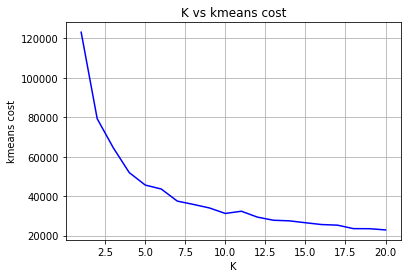

In [ ]:
#costs = elbow("forgy", "euclidean")
#print(costs)
#costs = np.array(costs)
#save_to_pickle(costs, "part2_kmeans.pkl")
costs = load_from_pickle("part2_kmeans.pkl")
plot_elbow(costs)

## Graph with Kmeans ++ 

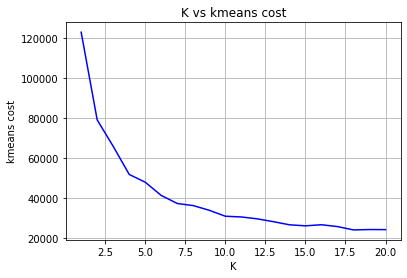

In [ ]:
#costs = elbow("k++", "euclidean")
#print(costs)
#costs = np.array(costs)
#save_to_pickle(costs, "part2_k++.pkl")
costs = load_from_pickle("part2_k++.pkl")
plot_elbow(costs)

#### **INFERENCE** : K = 10 is optimal

## Creating clusters on training data

In [ ]:
optimalK = 10

def fit(X, k, algo, distance_metric):
    cent, clusters = kmeans(k, X, algo, distance_metric)
    cent = np.array(cent)
    clusters = np.array(clusters)
    return cent, clusters


def get_accuracy_score(y, clusters):
    return (homogeneity_score(y, clusters))


#kmeans_centroids, kmeans_clusters = fit(X_train, optimalK, "forgy", "euclidean")
#save_to_pickle(kmeans_centroids, "part2_kmeans_centroids.pkl")
#save_to_pickle(kmeans_clusters, "part2_kmeans_clusters.pkl")
kmeans_centroids = load_from_pickle("part2_kmeans_centroids.pkl")
kmeans_clusters = load_from_pickle("part2_kmeans_clusters.pkl")

print("Homogenity score for kmeans")
print("---------------------------\n")
print(get_accuracy_score(y_train, kmeans_clusters))

#kplus_centroids, kplus_clusters = fit(X_train, optimalK, "k++", "euclidean")
#save_to_pickle(kplus_centroids, "part2_k++_centroids.pkl")
#save_to_pickle(kplus_clusters, "part2_k++_clusters.pkl")
kplus_centroids = load_from_pickle("part2_k++_centroids.pkl")
kplus_clusters = load_from_pickle("part2_k++_clusters.pkl")

print("\n\nHomogenity score for kmeans++")
print("-----------------------------\n")
print(get_accuracy_score(y_train, kplus_clusters))

Homogenity score for kmeans
---------------------------

0.49244924371463206


Homogenity score for kmeans++
-----------------------------

0.47824374514249585


## INFERENCE : Latent space representation is better because it is equaivalent to the original data with less no. of dimensions which highly decreases the training time of algorithm without affecting much accuracy.